<a href="https://colab.research.google.com/github/BharatXBhalla/Data-Analytics-CDAC/blob/main/Assignments/DA_Assignment_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Assume the weight steps of 10%:

In [2]:
ExpectedReturn = [9.00,9.20,9.40,9.60,9.80,10.00,10.20,10.40,10.60,10.80,11.00]
StandardDeviation = [8.0,7.5,7.1,6.9,6.8,7.0,7.3,7.8,8.5,9.2,10.0]

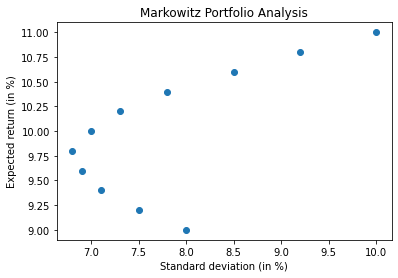

In [3]:
plt.scatter(StandardDeviation, ExpectedReturn)
plt.xlabel("Standard deviation (in %)")
plt.ylabel("Expected return (in %)")
plt.title("Markowitz Portfolio Analysis")
plt.show()

In [4]:
pip install --upgrade pandas-datareader

     |████████████████████████████████| 109 kB 33.9 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


In [5]:

from pandas_datareader import data as dr


In [6]:
stocks = ['GOOG', 'AMZN','TSLA']

In [7]:
stock_data = pd.DataFrame()
for s in stocks:
    stock_data[s] = dr.DataReader(s, data_source = 'yahoo', start = '2009-12-31',end='2020-04-09')['Adj Close']

In [8]:
stock_data.head()

,GOOG,AMZN,TSLA
Date,,,
2009-12-31,308.832428,134.520004,NaN
2010-01-04,312.204773,133.899994,NaN
2010-01-05,310.829926,134.690002,NaN
2010-01-06,302.994293,132.250000,NaN
2010-01-07,295.940735,130.000000,NaN


In [9]:
stock_data.tail()

,GOOG,AMZN,TSLA
Date,,,
2020-04-03,1097.880005,1906.589966,96.001999
2020-04-06,1186.920044,1997.589966,103.248001
2020-04-07,1186.510010,2011.599976,109.089996
2020-04-08,1210.280029,2043.000000,109.767998
2020-04-09,1211.449951,2042.760010,114.599998


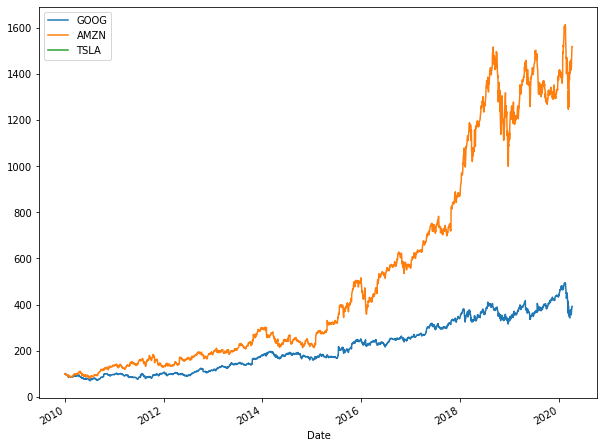

In [37]:
(stock_data/stock_data.iloc[0] * 100).plot(figsize = (10,8))

In [11]:
logReturns = np.log(stock_data/stock_data.shift(1))
logReturns

,GOOG,AMZN,TSLA
Date,,,
2009-12-31,NaN,NaN,NaN
2010-01-04,0.010860,-0.004620,NaN
2010-01-05,-0.004413,0.005883,NaN
2010-01-06,-0.025532,-0.018282,NaN
2010-01-07,-0.023555,-0.017160,NaN
...,...,...,...
2020-04-03,-0.020697,-0.006399,0.054675
2020-04-06,0.077981,0.046625,0.072765
2020-04-07,-0.000346,0.006989,0.055039


In [12]:
#To obtain annual average returns!
logReturns.mean() * 250 

GOOG    0.132183
AMZN    0.263089
TSLA    0.322647
dtype: float64

In [13]:
#To obtain annual covariance between PG and Microsoft
logReturns.cov() * 250 

,GOOG,AMZN,TSLA
GOOG,0.065060,0.045656,0.040919
AMZN,0.045656,0.097146,0.049807
TSLA,0.040919,0.049807,0.290445


In [14]:
stock_data.corr()

,GOOG,AMZN,TSLA
GOOG,1.000000,0.961019,0.862392
AMZN,0.961019,1.000000,0.755115
TSLA,0.862392,0.755115,1.000000


In [15]:
# Dynamically generating weights code
numberOfStocks = len(stocks)
numberOfStocks

3

In [16]:
#random weights
#weights = np.random.random(numberOfStocks)
#weights = weights/np.sum(weights)


In [21]:
weights1 = [0.19018562, 0.93358835,0.45]

weights1

[0.19018562, 0.93358835, 0.45]

In [22]:
weights = weights1/np.sum(weights1)#rebalance
weights

array([0.12084685, 0.59321629, 0.28593687])

Calculating expected return of portfolio

In [23]:
(weights * logReturns.mean()).sum() * 250

0.2642994475194687

Expected standard deviance or volatility


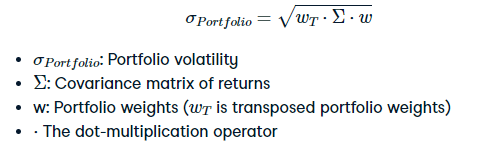

In [24]:
np.sqrt(np.dot(weights.T, np.dot(logReturns.cov() * 250, weights)))

0.2918112308212988

In [38]:

expectedReturn = []
standardDeviation = []
weightList0 = []
weightList1 = []

# Running simulations for finding optimum weights
for i in range(1000):
    weights = np.random.random(numberOfStocks)
    weights = weights/ weights.sum()
    weightList0.append(weights[0])
    weightList1.append(weights[1])
    expectedReturn.append((weights * logReturns.mean()).sum() * 250)
    standardDeviation.append(np.sqrt(np.dot(weights.T, np.dot(logReturns.cov() * 250, weights))))

#Converting lists into arrays
weightList0 = np.array(weightList0) #Weights for PG
weightList1 = np.array(weightList1) #Weights for MSFT
expectedReturn = np.array(expectedReturn) 
standardDeviation = np.array(standardDeviation)

#Creating dataframe
df = pd.DataFrame({"Weight of PG": weightList0, "Weight of MSFT": weightList1, "Expected Return": expectedReturn, "Standard deviation": standardDeviation})
df.head()

,Weight of PG,Weight of MSFT,Expected Return,Standard deviation
0,0.561885,0.094655,0.209991,0.282066
1,0.328814,0.475111,0.231723,0.262584
2,0.076392,0.483977,0.279272,0.326481
3,0.585527,0.089810,0.205776,0.277429
4,0.610620,0.360074,0.184901,0.244326


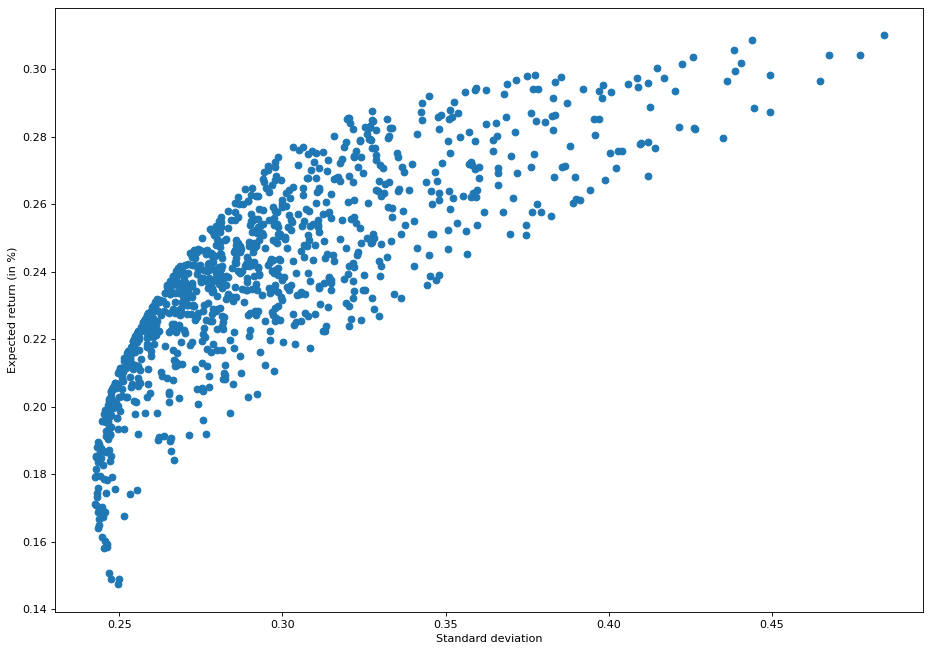

In [39]:
plt.figure(figsize=(14, 10), dpi=80)
plt.scatter(df["Standard deviation"], df["Expected Return"])
plt.xlabel("Standard deviation")
plt.ylabel("Expected return (in %)")
plt.show()

In [40]:
df[(df["Expected Return"]>0.18) & (df["Expected Return"]< 0.20)].sort_values(by=['Expected Return'])


,Weight of PG,Weight of MSFT,Expected Return,Standard deviation
501,0.646183,0.303963,0.181469,0.242785
34,0.619388,0.367976,0.182760,0.245104
684,0.655720,0.238179,0.183571,0.243365
973,0.674293,0.171841,0.183984,0.247044
851,0.723492,0.011453,0.184166,0.266881
4,0.610620,0.360074,0.184901,0.244326
889,0.632000,0.291366,0.184921,0.242779
730,0.665817,0.175616,0.185374,0.247451
173,0.629663,0.290482,0.185419,0.242840
550,0.639727,0.240645,0.186470,0.244123


In [42]:
df[(df["Expected Return"]>0.18)].sort_values(by=['Expected Return']).head(10)


,Weight of PG,Weight of MSFT,Expected Return,Standard deviation
501,0.646183,0.303963,0.181469,0.242785
34,0.619388,0.367976,0.182760,0.245104
684,0.655720,0.238179,0.183571,0.243365
973,0.674293,0.171841,0.183984,0.247044
851,0.723492,0.011453,0.184166,0.266881
4,0.610620,0.360074,0.184901,0.244326
889,0.632000,0.291366,0.184921,0.242779
730,0.665817,0.175616,0.185374,0.247451
173,0.629663,0.290482,0.185419,0.242840
550,0.639727,0.240645,0.186470,0.244123


In [43]:
df["Expected Return"].mean()

0.2394221406231799

In [44]:
df["Expected Return"].sort_values().median()

0.23899152386560021

In [45]:
df[(df["Expected Return"]>0.135)].sort_values(by=['Expected Return'])


,Weight of PG,Weight of MSFT,Expected Return,Standard deviation
953,0.913824,0.021348,0.147325,0.249724
72,0.908204,0.012910,0.148898,0.250045
411,0.876380,0.113552,0.148966,0.247333
51,0.870193,0.102105,0.150826,0.246717
741,0.801853,0.196714,0.158207,0.245187
...,...,...,...,...
664,0.078913,0.059033,0.304101,0.477122
266,0.066797,0.094114,0.304319,0.467623
55,0.021867,0.213925,0.305741,0.438384
713,0.005310,0.218395,0.308628,0.443845


In [46]:
df.loc[15]

Weight of PG          0.130233
Weight of MSFT        0.556135
Expected Return       0.264720
Standard deviation    0.295043
Name: 15, dtype: float64